<div style = "text-align:center;">
    <h1>AE441A : Rocket Propulsion<hr>
    DEPARTMENT OF AEROSPACE ENGINEERING<br>
    Indian Insitute of Technology Kanpur<hr>
    Assignment 2
    </h1>
</div>

<div style = "text-align:center;">
<h2>Instructor: Sathesh Mariappan<br><hr>
    Submitted By:<br>
    Ankit Lakhiwal (180102)</h2>
    <a>ankitl@iitk.ac.in</a>
    <hr>
</div>

# Q. Calculation of adiabatic flame temperature for various equivalence ratio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fuel CH4

In [2]:
# equivalance ratio
phi = np.arange(0.5,1.6,0.1)

In [3]:
# coefficients for varying Cp condition  in range 1000 - 5000 K
# a1, a2, a3, a4, a5, a6 
coeff_CO2 = [0.04453623*pow(10,2), 0.03140168*pow(10,-1), -0.12784105*pow(10,-5),
             0.02393996*pow(10,-8), -0.16690333*pow(10,-13), -0.04896696*pow(10,6)]
coeff_H2O = [0.02672145*pow(10,2), 0.03056293*pow(10,-1), -0.08730260*pow(10,-5), 
            0.12009964*pow(10,-9), -0.06391618*pow(10,-13), -0.02989921*pow(10,6)]
coeff_N2 = [0.02926640*pow(10,2), 0.14879768*pow(10,-2), -0.05684760*pow(10,-5), 
            0.10097038*pow(10,-9), -0.06753351*pow(10,-13), -0.02989921*pow(10,4)]
coeff_O2 = [0.03697578*pow(10,2), 0.06135197*pow(10,-2), -0.12588420*pow(10,-6), 
            0.01775281*pow(10,-9), -0.11364354*pow(10,-14), -0.12339301*pow(10,4)]
coeff_CH4 = [-0.29149, 26.327, -10.610, 1.5656, 0.16573,-18.331]

In [4]:
# coefficients for varying Cp condition  in range 300 - 1000 K
# a1, a2, a3, a4, a5, a6 
coeff_CO2_2 = [0.02275724*pow(10,2), 0.09922072*pow(10,-1), -0.10409113*pow(10,-4),
             0.06866686*pow(10,-7), -0.02117280*pow(10,-10), -0.04837314*pow(10,6)]
coeff_H2O_2 = [0.03386842*pow(10,2), 0.03474982*pow(10,-1), -0.06354696*pow(10,-4), 
            0.06968581*pow(10,-7), -0.02506588*pow(10,-10), -0.03020811*pow(10,6)]
coeff_N2_2 = [0.03298677*pow(10,2), 0.14082404*pow(10,-2), -0.03963222*pow(10,-4), 
            0.05641515*pow(10,-7), -0.02444854*pow(10,-10), -0.10208999*pow(10,4)]
coeff_O2_2 = [0.03212936*pow(10,2), 0.11274864*pow(10,-2), -0.05756150*pow(10,-5), 
            0.13138773*pow(10,-8), -0.08768554*pow(10,-11), -0.10052490*pow(10,4)]
coeff_CH4_2 = [-0.29149, 26.327, -10.610, 1.5656, 0.16573,-18.331]

In [5]:
def sensible_enthalpy_at_Tref(coeff,Tref):
    Ru = 8.314
    hsi = Ru*(coeff[0]*(Tref) + (coeff[1]/2)*(pow(Tref,2)) + (coeff[2]/3)*(pow(Tref,3)) + \
        (coeff[3]/4)*(pow(Tref,4)) + (coeff[4]/5)*(pow(Tref,5)) + coeff[5])
    return hsi

def sensible_enthalpy_fuel_at_Tref(coeff,Tref):
    theta = Tref/1000
    hsi_fuel = 4184*(coeff[0]*(theta) + (coeff[1]/2)*(pow(theta,2)) + (coeff[2]/3)*(pow(theta,3)) +\
        (coeff[3]/4)*(pow(theta,4)) - coeff[4]*(pow(theta,-1)) + coeff[5])
    return hsi_fuel

In [6]:
def sensible_enthalpy(coeff,T,Tref):
    Ru = 8.314
    hsi = Ru*(coeff[0]*(T-Tref) + (coeff[1]/2)*(pow(T,2)-pow(Tref,2)) + (coeff[2]/3)*(pow(T,3)-pow(Tref,3)) + \
        (coeff[3]/4)*(pow(T,4)-pow(Tref,4)) + (coeff[4]/5)*(pow(T,5)-pow(Tref,5))  + coeff[5])
    return hsi

def sensible_enthalpy_fuel(coeff,T,Tref):
    theta = T/1000
    theta0 = Tref/1000
    hsi_fuel = 4184*(coeff[0]*(theta-theta0) + (coeff[1]/2)*(pow(theta,2)-pow(theta0,2)) + \
                (coeff[2]/3)*(pow(theta,3)-pow(theta0,3)) + (coeff[3]/4)*(pow(theta,4)-pow(theta0,4)) - \
                 coeff[4]*(pow(theta,-1)-pow(theta0,-1)) + coeff[5])
    return hsi_fuel

In [7]:
def adiabaticFlameTemp(phi,Ti,isCPVary,num_of_carbon_in_fuel=1,num_of_hydrozen_in_fuel=4):
    # adiabatic flame temprature [kelvin]
    Tad = np.empty((len(phi),1))
    
    # NO. of elements in fuel
    C = num_of_carbon_in_fuel
    H = num_of_hydrozen_in_fuel

    
    O2_and_N2_in_1mole_of_air = 4.76
    mass_of_air = 28.84         # [Kg/Kmol]
    mass_of_fuel = C*12 + H*1   # [Kg/Kmol]
    moles_of_fuel = 1
    # stoichiometric air to fuel ratio
    stochio_AbyF = 2*(mass_of_air)*O2_and_N2_in_1mole_of_air/(mass_of_fuel*moles_of_fuel)

    # stdandard entahaly of formation @ 298 K
    hf0_Fuel_at_Tref = -74831
    hf0_CO2_at_Tref = -393546
    hf0_H2O_at_Tref = -241845
    hf0_N2_at_Tref = 0
    hf0_O2_at_Tref = 0

    # specific heat capacity at T = 1200 K 
    CP_CH4 = 78.84
    CP_CO2 = 56.21
    CP_H2O = 43.87
    CP_N2 = 33.71
    CP_O2 = 35.59
    
    # Standardized enthalpy for constant Cp
    def stdz_enthalpy_at_constant_CP(T):
        hfFuel  = hf0_Fuel_at_Tref + CP_CH4*(T-298)
        hfCO2   = hf0_CO2_at_Tref + CP_CO2*(T-298)
        hfH2O   = hf0_H2O_at_Tref + CP_H2O*(T-298)
        hfN2    = hf0_N2_at_Tref  + CP_N2*(T-298)
        hfO2    = hf0_O2_at_Tref  + CP_O2*(T-298)
        return hfFuel, hfCO2, hfH2O, hfN2, hfO2
    
    hf_Fuel,hf_CO2,hf_H2O,hf_N2 ,hf_O2 = stdz_enthalpy_at_constant_CP(Ti)

    for i in range(len(phi)):
        # air to fuel ratio
        AbyF = stochio_AbyF/phi[i]
        moles_of_air = AbyF*moles_of_fuel*mass_of_fuel/mass_of_air
        b = moles_of_air/O2_and_N2_in_1mole_of_air

        #Consider the combustion equation for fuel CxHy
        # CxHy + b(O2+3.76N2)----> xCO2 + (0.5y)H2O + ((2b-2x-0.5y)/2)O2 + (3.76b)N2    fuel lean condition
        if phi[i] <= 1:
            Nr = np.array((1,b))    # moles of reactants elements
            Np = np.array((C,H/2,(2*b-2*C-0.5*H)/2,3.76*b,(4*C+H-4*b/4*C+H)))     # moles of products elements
            
        # CxHy + b(O2+3.76N2)----> b(4x/4x+y)CO2 + (2by/4x+y)H2O + (3.76b)N2 + (4x+y-4b/4x+y)CxHy   fuel rich condition
        else:
            Nr = np.array((1,b))    # moles of reactants elements
            Np = np.array((b*4*C/(4*C+H),2*b*H/(4*C+H),0,3.76*b,(4*C+H-4*b)/(4*C+H)))     # moles of products elements
        
        # For constant Cp condition 
        if not isCPVary:   
            H_react = Nr[0]*hf_Fuel + Nr[1]*(hf_O2 + 3.76*hf_N2)
            # Adiabatic flame temprature for constant Cp
            Tad[i] = (H_react - Np[0]*(hf0_CO2_at_Tref - CP_CO2*298) - Np[1]*(hf0_H2O_at_Tref - CP_H2O*298) - \
                        Np[2]*(hf0_O2_at_Tref - CP_O2*298) - Np[3]*(hf0_N2_at_Tref - CP_N2*298))/ \
                        (Np[0]*CP_CO2+Np[1]*CP_H2O+Np[2]*CP_O2+Np[3]*CP_N2)
        
        # For Varying Cp condition
        if isCPVary:
            H_react = Nr[0]*(hf0_Fuel_at_Tref+sensible_enthalpy_fuel(coeff=coeff_CH4_2,T=Ti,Tref=298)) + \
                      Nr[1]*((hf0_O2_at_Tref + sensible_enthalpy(coeff=coeff_O2_2,T=Ti,Tref=298)) + \
                            3.76*(hf0_N2_at_Tref + sensible_enthalpy(coeff=coeff_N2_2,T=Ti,Tref=298)))
            # Sensible enthalpy of products at Tref
            Hs_product_at_Tref = Np[0]*sensible_enthalpy_at_Tref(coeff=coeff_CO2,Tref=298) + \
                                 Np[1]*sensible_enthalpy_at_Tref(coeff=coeff_H2O,Tref=298) + \
                                 Np[2]*sensible_enthalpy_at_Tref(coeff=coeff_N2,Tref=298) + \
                                 Np[3]*sensible_enthalpy_fuel_at_Tref(coeff=coeff_CH4,Tref=298)
            # enthalpy of formation of products at Tref
            Hf0_products_at_Tref = Np[0]*hf0_CO2_at_Tref + Np[1]*hf0_H2O_at_Tref + Np[2]*hf0_N2_at_Tref + \
                                   Np[3]*hf0_Fuel_at_Tref
            # polynomial equation to solve for Tad
            K = H_react - (Hf0_products_at_Tref-Hs_product_at_Tref) 
            K1 = Np[0]*np.array((coeff_CO2[4]/5,coeff_CO2[3]/4,coeff_CO2[2]/3,coeff_CO2[1]/2,coeff_CO2[0],coeff_CO2[5],0))*8.314
            K2 = Np[1]*np.array((coeff_H2O[4]/5,coeff_H2O[3]/4,coeff_H2O[2]/3,coeff_H2O[1]/2,coeff_H2O[0],coeff_H2O[5],0))*8.314
            K3 = Np[2]*np.array((coeff_N2[4]/5,coeff_N2[3]/4,coeff_N2[2]/3,coeff_N2[1]/2,coeff_N2[0],coeff_N2[5],0))*8.314
            K4 = Np[3]*np.array((0,coeff_CH4[3]*pow(10,-12)/4,coeff_CH4[2]*pow(10,-9)/3,coeff_CH4[1]*pow(10,-6)/2,
                                coeff_CH4[0]*pow(10,-3),coeff_CH4[5],coeff_CH4[4]*pow(10,3)))*4184
            
            poly = K1 + K2 + K3 + K4
            poly[5] = poly[5] - K
            r = np.roots(poly)
            for j in r.real[abs(r.imag)<1e-6]:
                if j.real>1 and j.real<5000:
                    Tad[i]=j.real
                    break
    return Tad

# Constant Cp

In [8]:
T_adiabatic_298 = adiabaticFlameTemp(phi=phi, isCPVary=0, Ti=298)
T_adiabatic_500 = adiabaticFlameTemp(phi=phi, isCPVary=0, Ti=500)
T_adiabatic_700 = adiabaticFlameTemp(phi=phi, isCPVary=0, Ti=700)

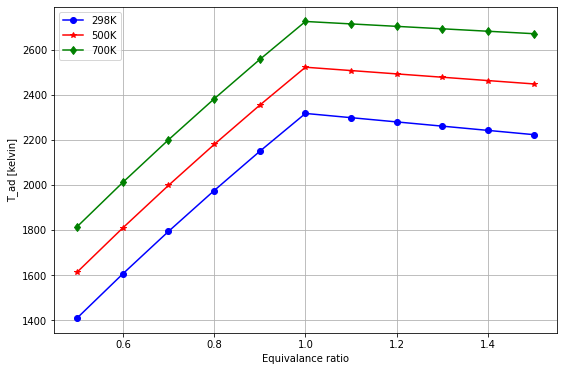

In [9]:
plt.figure(figsize=(9,6))
plt.plot(phi,T_adiabatic_298,'-ob')
plt.plot(phi,T_adiabatic_500,'-*r')
plt.plot(phi,T_adiabatic_700,'-dg')
plt.grid();
plt.xlabel("Equivalance ratio");plt.ylabel("T_ad [kelvin]");
plt.legend(['298K','500K','700K']);

# Varying Cp

In [10]:
T_adiabatic_298_varyCP = adiabaticFlameTemp(phi=phi, isCPVary=1, Ti=298)
T_adiabatic_500_varyCP = adiabaticFlameTemp(phi=phi, isCPVary=1, Ti=500)
T_adiabatic_700_varyCP = adiabaticFlameTemp(phi=phi, isCPVary=1, Ti=700)

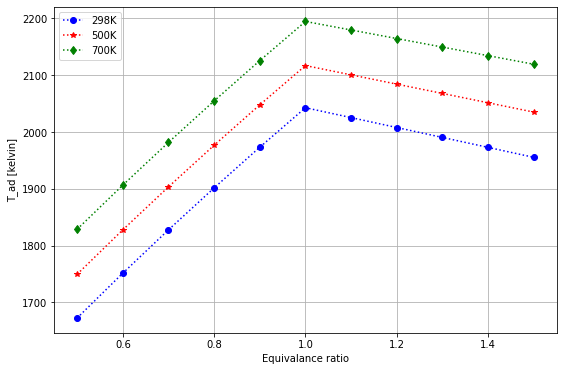

In [11]:
plt.figure(figsize=(9,6))
plt.plot(phi,T_adiabatic_298_varyCP,":ob")

plt.plot(phi,T_adiabatic_500_varyCP,":*r")

plt.plot(phi,T_adiabatic_700_varyCP,":dg")

plt.grid();
plt.xlabel("Equivalance ratio");plt.ylabel("T_ad [kelvin]");
plt.legend(['298K','500K','700K']);

# % Error

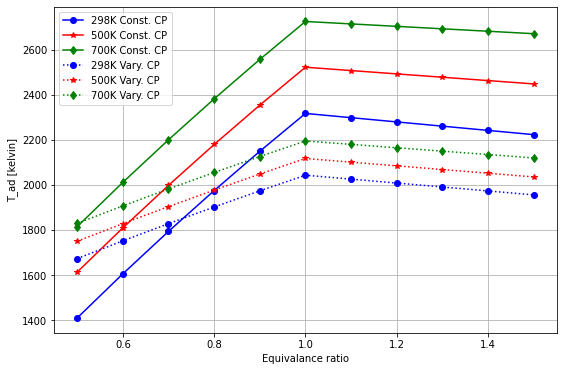

In [12]:
plt.figure(figsize=(9,6))
plt.plot(phi,T_adiabatic_298,'-ob')
plt.plot(phi,T_adiabatic_500,'-*r')
plt.plot(phi,T_adiabatic_700,'-dg')

plt.plot(phi,T_adiabatic_298_varyCP,':ob')
plt.plot(phi,T_adiabatic_500_varyCP,':*r')
plt.plot(phi,T_adiabatic_700_varyCP,':dg')

plt.grid();
plt.xlabel("Equivalance ratio");plt.ylabel("T_ad [kelvin]");
plt.legend(['298K Const. CP','500K Const. CP','700K Const. CP','298K Vary. CP','500K Vary. CP','700K Vary. CP']);

In [13]:
def Error(data1,data2):
    err = (np.abs(data1-data2)/data1)*100
    return err

In [14]:
T_298_Error = Error(T_adiabatic_298,T_adiabatic_298_varyCP)
T_500_Error = Error(T_adiabatic_500,T_adiabatic_500_varyCP)
T_700_Error = Error(T_adiabatic_700,T_adiabatic_700_varyCP)

In [15]:
error = [T_298_Error.mean(),T_500_Error.mean(),T_700_Error.mean()]
T = [298,500,700]
pd.DataFrame({
    'Temp. [K]' : T,
    'Mean % Error':error,
})

,Temp. [K],Mean % Error
0,298,10.287816
1,500,12.296221
2,700,15.161905


# Observations

## 1. Adiabatic flame temprature increases in fuel lean (phi < 1) region as we increase equivalence ratio.
## 2. Adiabatic flame temprature decreases in fuel rich (phi > 1) region as we increase equivalence ratio.
## 3. As we increase reference temprature, adiabatic flame temprature increase.
## 4. For varying Cp (realistic condition), adiabatic temprature is lower than the constant Cp (ideal condition) adiabatic temprature.